In [40]:
from collections import OrderedDict
from IPython.display import IFrame
from matplotlib import pyplot as plt
from itertools import product
from classes import *
import os
%matplotlib inline

## Visualizing results of test experiments

In [141]:
!ls -l ../tmp/

total 184
-rw-r--r-- 1 eputints kondrgrp    216 Apr 12 16:20 20180412-1340_Dropout_rate_mse.txt
-rw-r--r-- 1 eputints kondrgrp    214 Apr 12 21:11 20180412-1820_Weight_decay_mse.txt
-rw-r--r-- 1 eputints kondrgrp    183 Apr 13 12:03 20180413-1120_Weight_decay_tuning_mse.txt
-rw-r--r-- 1 eputints kondrgrp    185 Apr 14 15:19 20180414-1435_Weight_decay_tuning_mse.txt
-rw-r--r-- 1 eputints kondrgrp    182 Apr 14 20:03 20180414-1906_Weight_decay_tuning_mse.txt
-rw-r--r-- 1 eputints kondrgrp    298 Apr 15 00:39 20180414-2207_Block_repeats_mse.txt
-rw-r--r-- 1 eputints kondrgrp    169 Apr 16 00:48 20180415-2105_Scale_mse.txt
-rw-r--r-- 1 eputints kondrgrp    107 Apr 16 15:56 20180416-1552_Dense_weight_decay_mse.txt
-rw-r--r-- 1 eputints kondrgrp    332 Apr 16 16:23 20180416-1608_Dense_dropout_mse.txt
-rw-r--r-- 1 eputints kondrgrp    933 Apr 17 23:19 20180417-1328_Scale_block_grid_mse.txt
-rw-r--r-- 1 eputints kondrgrp    929 Apr 19 01:14 20180418-1610_Scale_block_grid_mse.txt
-rw-r--r-- 1 e

In [162]:
f='../tmp/20180430-1303_S1B2_mse.txt'
experiment=f.split('/')[-1].split('_')[0]

In [163]:
mse_train=list(pd.DataFrame.from_csv(f,sep='\t').ix['Train'])
mse_val=list(pd.DataFrame.from_csv(f,sep='\t').ix['Test'])

/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':
/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app
/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning:

In [164]:
variable_tested_1 = [0, 0.1, 0.2, 0.3, 0.4]
variable_tested_2 = [0.5,0.6,0.7,0.8,0.9,1.]

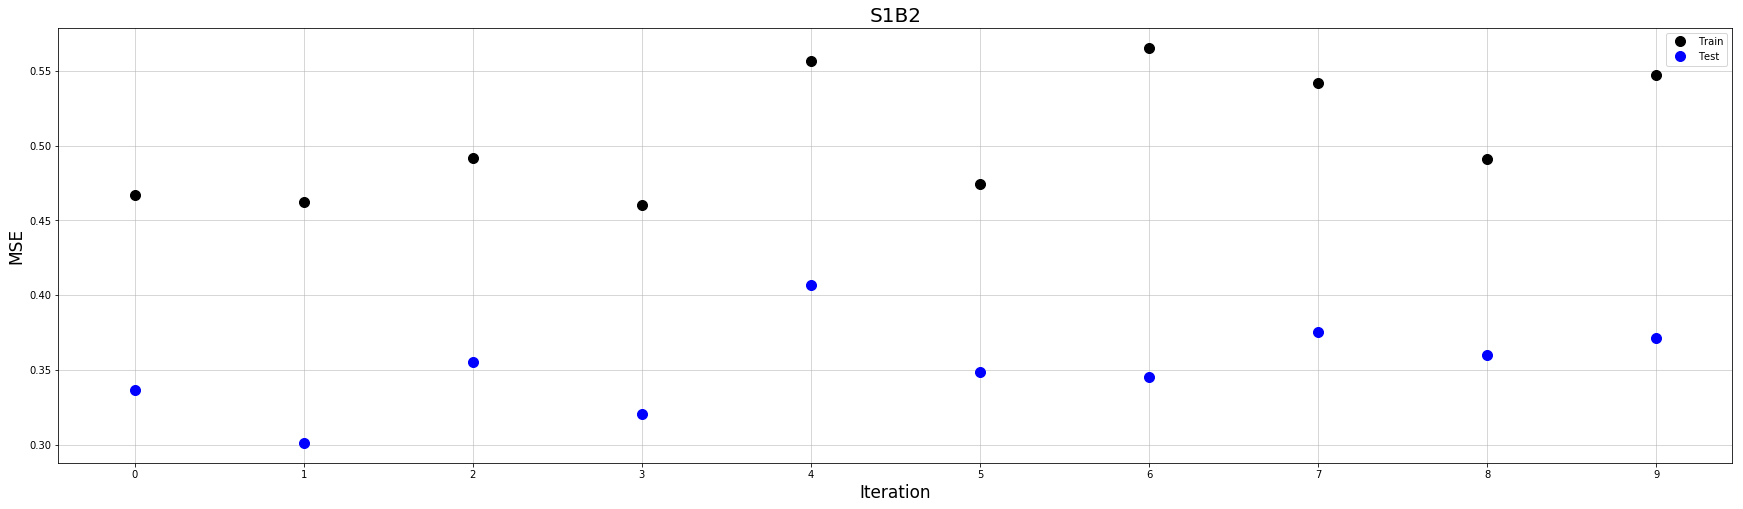

In [165]:
plt.figure(figsize=[30,8])
plt.plot([x for x in range(len(mse_train))],mse_train,'ok',label='Train',ms=10)
plt.plot([x for x in range(len(mse_val))],mse_val,'ob',label='Test',ms=10)
plt.ylabel('MSE',fontsize=17)
plt.xlabel('Iteration',fontsize=17)
plt.legend()
plt.title(f.split('_')[1],fontsize=20)
plt.grid('k',lw=0.5)
plt.xticks([x for x in range(len(mse_train))])
plt.savefig('../figures/'+experiment+'_'+'_'.join(f.split('_')[1:-1])+'.pdf');

In [124]:
!ls -l ../figures/

total 283
-rw-r--r-- 1 eputints kondrgrp 13238 Apr 13 11:14 20180412-1340_Dropout_rate.pdf
-rw-r--r-- 1 eputints kondrgrp 12015 Apr 13 11:23 20180412-1820_Weight_decay.pdf
-rw-r--r-- 1 eputints kondrgrp 11922 Apr 13 14:56 20180413-1120_Weight_decay_tuning.pdf
-rw-r--r-- 1 eputints kondrgrp 12527 Apr 14 22:05 20180414-1906_Weight_decay_tuning.pdf
-rw-r--r-- 1 eputints kondrgrp 14330 Apr 15 10:42 20180414-2207_Block_repeats.pdf
-rw-r--r-- 1 eputints kondrgrp 10461 Apr 16 11:56 20180415-2105_Scale.pdf
-rw-r--r-- 1 eputints kondrgrp 11939 Apr 16 16:05 20180416-1552_Dense_weight_decay.pdf
-rw-r--r-- 1 eputints kondrgrp 13098 Apr 16 16:24 20180416-1608_Dense_dropout.pdf
-rw-r--r-- 1 eputints kondrgrp 13696 Apr 18 16:09 20180417-1328_Scale_block_grid.pdf
-rw-r--r-- 1 eputints kondrgrp 15443 Apr 19 11:55 20180419-1154_Scale_block_grid_train.pdf
-rw-r--r-- 1 eputints kondrgrp 15742 Apr 19 11:55 20180419-1154_Scale_block_grid_val.pdf
-rw-r--r-- 1 eputints kondrgrp 17152 Apr 24 14:34 20180420-064

In [68]:
IFrame('../figures/20180414-1906_Weight_decay_tuning.pdf', width=600, height=600)

## Extracting good mutations

In [3]:
wt_sq = 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [4]:
f='./data/amino_acid_genotypes_to_brightness.txt'
batch_size,zero_sample_fraction = 200,0.5

input_data = Data(file_path=f,batch_size=batch_size,zero_sample_fraction=zero_sample_fraction, zeroing=True)

functions.py:22: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  initial_df = pd.DataFrame.from_csv(f, sep='\t', index_col=None)


IOError: File ./data/amino_acid_genotypes_to_brightness.txt does not exist

In [4]:
unique_mutations = []
for mut in input_data.mutant_list:
    unique_mutations.extend(mut)
    
unique_mutations = [[x] for x in set(unique_mutations)]

In [5]:
#start the list with a wild-type
sq_test_set = [wt_sq]

for mutant in unique_mutations:
    sq_test_set.append(make_mutant_sq(wt_sq, mutant))

In [6]:
#creating the initial 0-filled carcas of unfolded versions of sqs, which will be further turned into binary matricies of shape 238 by 20 (aas)
unfolded_df = OrderedDict()

for aa in set([item[-1] for sublist in unique_mutations for item in sublist]):
    unfolded_df[aa] = np.zeros((len(sq_test_set), len(wt_sq)))

#filling the binary matrices, corresponding to 20 different amino acids within the unfoded_df dict

for ind,mutant in enumerate(sq_test_set):
    for pos,mut in enumerate(mutant):
        unfolded_df[mut][ind, pos] = 1.

In [7]:
#stacking all the amino acids into one np array
input_df = np.stack(unfolded_df.values(),axis=1)

#putting the channel info (amino acids) to the end
input_df = np.swapaxes(input_df,-1,-2)

In [8]:
a = np.load('../tmp/'+experiment+'_predictions.npy')

In [23]:
f = open('../tmp/'+experiment+'_best_predicted_mutations.txt','w') 
f.write('Mutation\tTimesPredicted\tTrueBrightness\tStD\tUniqueBarcodes\n')

for i in range(len(unique_mutations)):
    test = sum(a[i+1])
    if test>=8 and len(input_data.initial_df[input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]])>0:
        print (unique_mutations[i][0]+'\t'+str(test)+'\t'+str(float(input_data.initial_df['medianBrightness'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['std'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['uniqueBarcodes'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\n')
        f.write(unique_mutations[i][0]+'\t'+str(test)+'\t'+str(float(input_data.initial_df['medianBrightness'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['std'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['uniqueBarcodes'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\n')
    
    elif test>=8 and len(input_data.initial_df[input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]])==0:
        print unique_mutations[i][0], test
    
f.close()

K1T	8.0	3.62977520434	0.0648078069455	2.0

T60S	8.0	3.76956207394	0.149814676718	11.0

I169H 8.0
I169V	8.0	3.73328176752	0.134486394974	25.0

I169S	8.0	3.79803541758	0.0432742939777	4.0

N210D	8.0	3.72106800103	0.0815761600693	18.0

K164E	8.0	3.74106939897	0.096936995744	32.0

K164N	8.0	3.72589521566	nan	1.0

I45V	8.0	3.77142177416	0.0876062093054	31.0

S173N	8.0	3.65267676782	0.0882553621266	3.0

S173G	9.0	3.75204274795	0.0954394777939	42.0

N162F 8.0
Y37S	8.0	3.85008641169	0.127413785544	2.0

Y235S 8.0
Y235D	8.0	3.75410080307	nan	1.0

K160G 8.0
A204T	8.0	3.81968408211	0.117514219338	3.0

H229L	8.0	3.67780487734	0.0888658082777	9.0

K212M	8.0	3.67766456215	0.116066304645	12.0

M231T	8.0	3.73130180581	0.0908269080725	27.0

K156M	8.0	3.72514961562	0.0816103311009	16.0

T7N 8.0
L234V	8.0	3.69366814543	0.0499395372263	3.0

K99E	10.0	3.71281118421	0.0866635653956	35.0

E233A	8.0	3.63512169662	nan	1.0

E233D	8.0	3.5195049389	nan	1.0

D127G	8.0	3.80426995512	0.0930126084003	28.0

V161A	10.0	

***

In [42]:
preds={}
for f in os.listdir('../tmp/'):
    if '.npy' in f:
        preds[f[:-4]] = np.load('../tmp/'+f)

In [91]:
def plot_reproducibility(df,name):
    record_overlap=[]
    for n in range(10):
        record_overlap.append(len(df[df.sum(axis=1)>n]))
    plt.figure(figsize=[10,8])
    plt.plot([x for x in range(10)],record_overlap,'ok')
    plt.grid(lw=0.6)
    plt.xlabel('Times predicted',fontsize=15)
    plt.ylabel('Number of mutations',fontsize=15)
    plt.title(name,fontsize=17)
    plt.savefig('../figures/'+name+'_reproducibility.pdf')

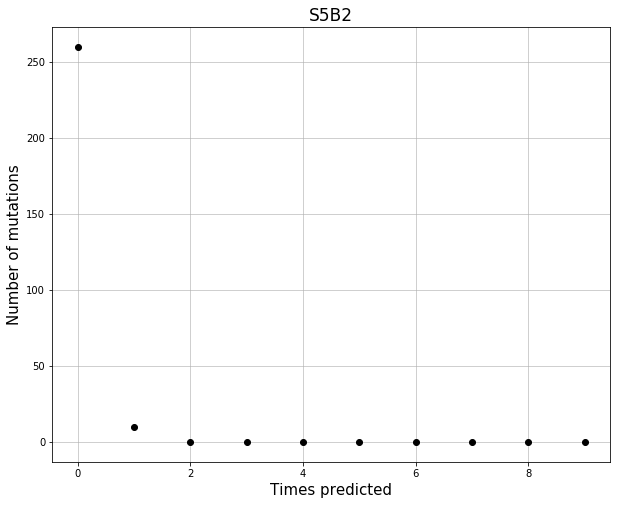

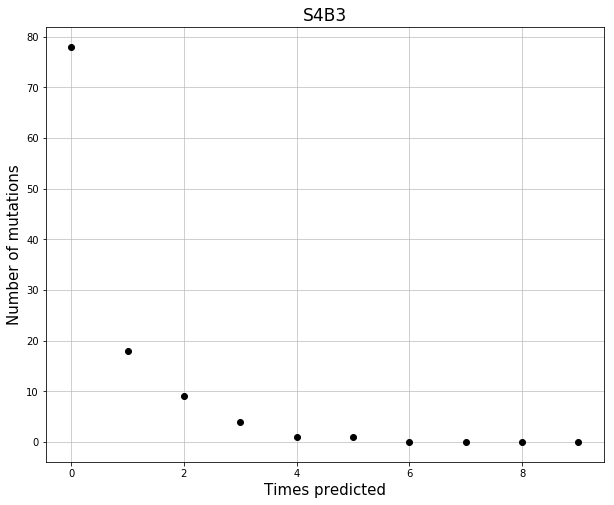

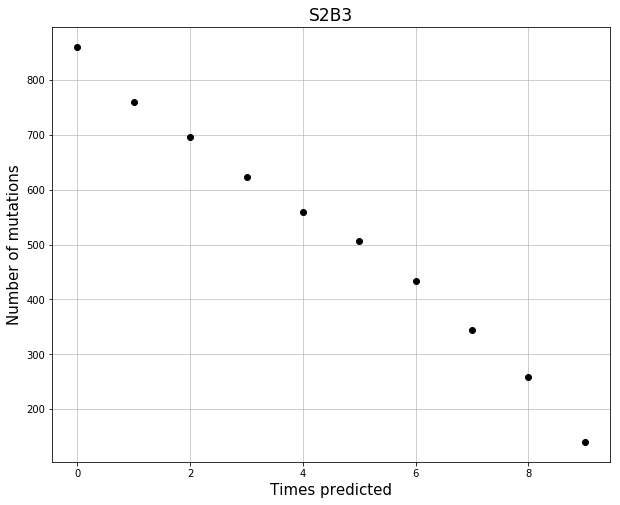

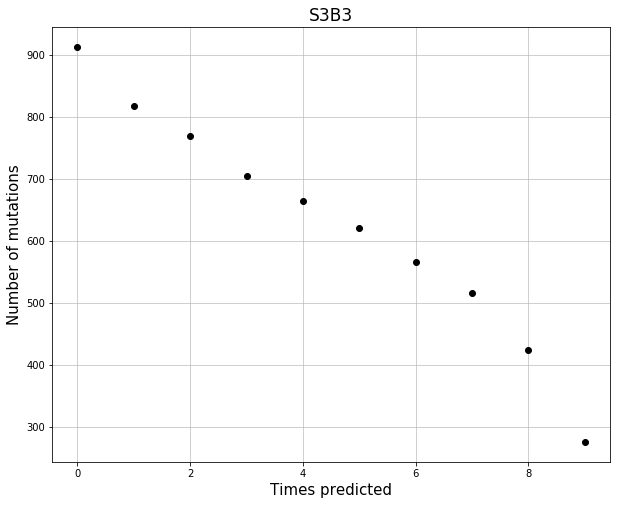

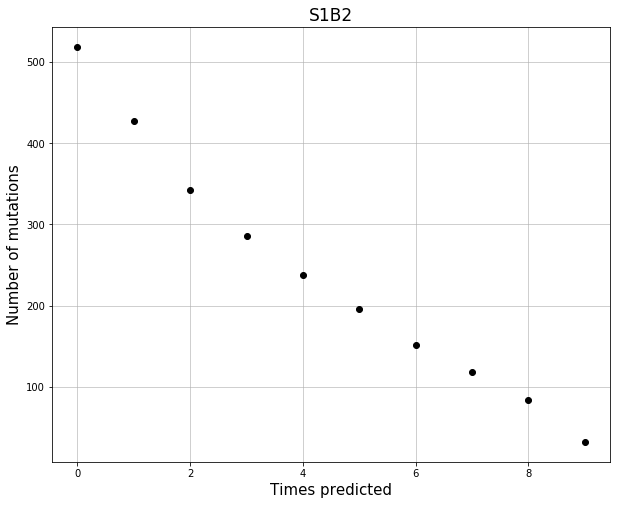

In [93]:
for pred in preds:
    plot_reproducibility(preds[pred],pred.split('_')[1])

In [60]:
for pred in preds:
    print pred
    print np.where(preds[pred].sum(axis=1)>9)

20180427-1808_S5B2_predictions
(array([], dtype=int64),)
20180427-1704_S4B3_predictions
(array([], dtype=int64),)
20180427-1509_S2B3_predictions
(array([  87,   88,   89,   90,   91,   93,   94,  114,  116,  160,  161,
        162,  165,  167,  171,  185,  190,  263,  299,  308,  309,  312,
        318,  321,  324,  326,  342,  357,  360,  365,  399,  421,  437,
        439,  455,  458,  486,  490,  493,  495,  500,  504,  519,  520,
        522,  529,  531,  542,  545,  547,  556,  622,  660,  708,  712,
        719,  755,  759,  781,  808,  819,  821,  834,  866,  869,  882,
        883,  889,  893,  895,  898,  907,  913,  916,  919,  923,  955,
        958,  962,  985, 1002, 1026, 1071, 1091, 1122, 1123, 1154, 1159,
       1162, 1171, 1182, 1184, 1240, 1244, 1248, 1265, 1268, 1287, 1288,
       1294, 1297, 1298, 1323, 1405, 1410, 1421, 1427, 1492, 1503, 1507,
       1510, 1513, 1546, 1557, 1565, 1596, 1617, 1635, 1637, 1640, 1641,
       1645, 1649, 1655, 1665, 1678, 1679, 1746, 17

(array([  11,   87,  256,  374,  418,  437,  439,  495,  516,  521,  553,
         593,  887,  890,  893,  898,  920, 1223, 1228, 1278, 1318, 1384,
        1503, 1566, 1637, 1645, 1663, 1679, 1685, 1743, 1774, 1805]),)